In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

pd.set_option('display.max_rows', None)  # None means unlimited rows
pd.set_option('display.max_columns', None)  # None means unlimited columns'

In [2]:
file_path = '../output/finalData.csv'
data = pd.read_csv(file_path)

data = data.sort_values(by='kay_contactid')

#data = data.sample(n=120000)
data = data.iloc[0:1600]

In [3]:
data.columns

Index(['kay_contactid', 'Gender', 'birthdate', 'HNI Customer',
       'Customer Concern', 'age', 'abs_age', 'age_range', 'Zone', 'Item',
       'BusinessUnit', 'InvoiceCenterCode', 'Promotion', 'TierName',
       'finalInvoiceId', 'FinalAmount', 'Category', 'PackageCode',
       'Marketbucket', 'CenterCode', 'Invoicecenter', 'PackageValiditydays',
       'Free', 'AQU', 'status2', 'ExistNewTag', 'Churn', 'month', 'year'],
      dtype='object')

In [4]:
data.head(3)

,kay_contactid,Gender,birthdate,HNI Customer,Customer Concern,age,abs_age,age_range,Zone,Item,BusinessUnit,InvoiceCenterCode,Promotion,TierName,finalInvoiceId,FinalAmount,Category,PackageCode,Marketbucket,CenterCode,Invoicecenter,PackageValiditydays,Free,AQU,status2,ExistNewTag,Churn,month,year
1661,535878,Male,2000-01-01,No,NaN,24,24,20-30,NORTH-Abhishek S,Package,ANTI-AGEING,KAS1,Campaign: EMP - 40% OFF ON HIFU-THERMAGE-ULTHERA,NaN,1D82BB3C-1205-4DAF-B616-83E5B2ECA415,69096,YOUTH RENEW MARVEL WITH THERMAGE,SOL-805-001,ANTI-AGEING,KAS1,NaN,90,no,No,LIVE,New,1,12,2021
1699,ACSH29,Female,2003-08-06,Yes,NaN,21,21,20-30,Academy,Package,Academy Course,TA02,Manual Discount,Platinum,27219E6C-CDBB-4A4B-8B02-87A11CD637A1,101244,SOOTHE AND BALANCE FACIAL,ACCourse-01-08,BEAUTY FACIALS,TA02,NaN,48,no,No,NaN,Existing,0,10,2021
1700,ACSH29,Female,2003-08-06,Yes,NaN,21,21,20-30,Academy,Package,Academy Course,TA02,Manual Discount,Platinum,27219E6C-CDBB-4A4B-8B02-87A11CD637A1,101244,OTHER,ACCourse-01-08,NaN,TA02,NaN,48,no,No,NaN,Existing,0,10,2021


In [5]:
data['kay_contactid'].nunique()

1028

In [6]:
#data['Zone4'].value_counts()

Epoch 1/5


c:\Users\goenk\anaconda3\envs\training\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5646 - loss: 0.6866 - val_accuracy: 0.6378 - val_loss: 0.6680
Epoch 2/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5961 - loss: 0.6583 - val_accuracy: 0.6378 - val_loss: 0.6778
Epoch 3/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6547 - loss: 0.6063 - val_accuracy: 0.3937 - val_loss: 0.7955
Epoch 4/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7688 - loss: 0.5051 - val_accuracy: 0.4409 - val_loss: 0.9339
Epoch 5/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8396 - loss: 0.3867 - val_accuracy: 0.5354 - val_loss: 1.1397
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4652 - loss: 0.7089
Test Accuracy: 0.5257142782211304


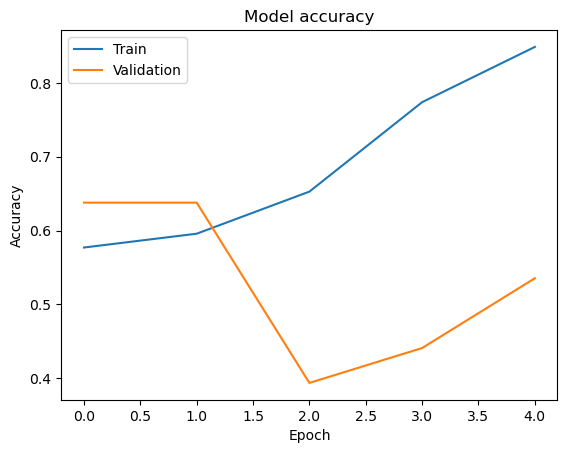

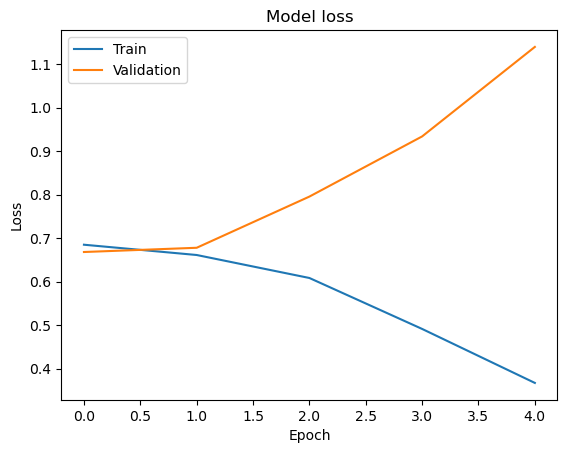

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Assuming 'data' is your pandas DataFrame containing the dataset
num_features = ['PackageValiditydays']
cat_features = ['age_range', 'Gender', 'HNI Customer', 'Zone', 'Item', 'BusinessUnit', 'TierName',
                'Marketbucket', 'Free', 'AQU', 'status2', 'ExistNewTag', 'FinalAmount',
                'InvoiceCenterCode', 'Promotion', 'Category', 'PackageCode',
                'CenterCode', 'finalInvoiceId', 'month', 'year']
# 'Zone4',
target_feature = 'Churn'

# Group data by 'kay_contactid'
contact_groups = data.groupby('kay_contactid')

# Get unique 'kay_contactid's
contact_ids = list(contact_groups.groups.keys())

# Shuffle 'kay_contactid's
import random
random.shuffle(contact_ids)

# Split 'kay_contactid's into training, validation, and test sets
train_contact_ids, test_contact_ids = train_test_split(contact_ids, test_size=0.2, random_state=42)
train_contact_ids, val_contact_ids = train_test_split(train_contact_ids, test_size=0.1, random_state=42)

# Filter data for training, validation, and test sets based on 'kay_contactid'
train_data = pd.concat([contact_groups.get_group(cid) for cid in train_contact_ids])
val_data = pd.concat([contact_groups.get_group(cid) for cid in val_contact_ids])
test_data = pd.concat([contact_groups.get_group(cid) for cid in test_contact_ids])

# Prepare X and y for training, validation, and test sets
X_train = train_data.drop(['kay_contactid', target_feature], axis=1)
y_train = train_data[target_feature]
X_val = val_data.drop(['kay_contactid', target_feature], axis=1)
y_val = val_data[target_feature]
X_test = test_data.drop(['kay_contactid', target_feature], axis=1)
y_test = test_data[target_feature]

# Check if all cat_features are in X_train
missing_features = set(cat_features) - set(X_train.columns)
if missing_features:
    raise ValueError(f"Missing columns in X_train: {missing_features}")

# Preprocess numerical features (standard scaling)
num_transformer = StandardScaler()
X_train_num = num_transformer.fit_transform(X_train[num_features])
X_val_num = num_transformer.transform(X_val[num_features])
X_test_num = num_transformer.transform(X_test[num_features])

# Preprocess categorical features (one-hot encoding)
cat_transformer = OneHotEncoder(handle_unknown='ignore')
cat_transformer.fit(X_train[cat_features])  # Fit the transformer only on X_train
X_train_cat = cat_transformer.transform(X_train[cat_features])
X_val_cat = cat_transformer.transform(X_val[cat_features])
X_test_cat = cat_transformer.transform(X_test[cat_features])

# Concatenate processed numerical and categorical features for training, validation, and test sets
X_train_processed = pd.concat([pd.DataFrame(X_train_num, columns=num_features),
                               pd.DataFrame(X_train_cat.toarray(), columns=cat_transformer.get_feature_names_out(cat_features))],
                              axis=1)

X_val_processed = pd.concat([pd.DataFrame(X_val_num, columns=num_features),
                             pd.DataFrame(X_val_cat.toarray(), columns=cat_transformer.get_feature_names_out(cat_features))],
                            axis=1)

X_test_processed = pd.concat([pd.DataFrame(X_test_num, columns=num_features),
                              pd.DataFrame(X_test_cat.toarray(), columns=cat_transformer.get_feature_names_out(cat_features))],
                             axis=1)

# Create TensorFlow datasets for training, validation, and test sets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_processed.values, y_train.values))
train_dataset = train_dataset.shuffle(buffer_size=len(train_dataset)).batch(16)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val_processed.values, y_val.values))
val_dataset = val_dataset.batch(16)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_processed.values, y_test.values))
test_dataset = test_dataset.batch(16)

# Build a neural network model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_processed.shape[1],)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping and using the validation dataset
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(train_dataset, epochs=5, validation_data=val_dataset, callbacks=[early_stopping])

# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy}")

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()




In [8]:
import pickle

# Save the trained model
model.save('trained_model.h5')

# Assuming `num_transformer`, `cat_transformer`, and `model` are your trained preprocessing transformers and model
# Save preprocessing transformers and model to disk using pickle
with open('preprocessors.pkl', 'wb') as file:
    pickle.dump(num_transformer, file)
    pickle.dump(cat_transformer, file)


In [9]:
# Extract 'kay_contactid' and all original columns for Test Data
test_ids_df = test_data.copy()  # Create a copy of test_data to include all original columns

# Show correct and incorrect predictions on test set
predictions = model.predict(test_dataset)
y_pred = (predictions > 0.5).astype(int)

# Create DataFrame for predictions including all original columns
predictions_df = pd.DataFrame({
    'kay_contactid': test_ids_df['kay_contactid'],  # Include 'kay_contactid'
    **test_ids_df.drop(['kay_contactid', target_feature], axis=1),  # Include all original columns
    'Actual Churn': y_test.values,
    'Predicted Churn': y_pred.flatten()
})

# Separate correct and incorrect predictions
correct_predictions = predictions_df[predictions_df['Actual Churn'] == predictions_df['Predicted Churn']]
incorrect_predictions = predictions_df[predictions_df['Actual Churn'] != predictions_df['Predicted Churn']]

print("\nCorrect Predictions on Test Set:")
print(correct_predictions)

print("\nIncorrect Predictions on Test Set:")
print(incorrect_predictions)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Correct Predictions on Test Set:
     kay_contactid  Gender   birthdate HNI Customer  Customer Concern  age  \
770      SSNC26259  Female  1991-05-27          Yes               NaN   33   
769      SSNC26259  Female  1991-05-27          Yes               NaN   33   
1470     DLFC13221  Female  2000-01-01          Yes               NaN   24   
1469     DLFC13221  Female  2000-01-01          Yes               NaN   24   
1522      MGJC8684  Female  1998-11-04          Yes               NaN   25   
899      SCRC27183  Female  2000-01-01          Yes               NaN   24   
903      SCRC27183  Female  2000-01-01          Yes               NaN   24   
902      SCRC27183  Female  2000-01-01          Yes               NaN   24   
901      SCRC27183  Female  2000-01-01          Yes               NaN   24   
900      SCRC27183  Female  2000-01-01          Yes               NaN   24   
1476     MTNC18996  Female  1997-08-30          Yes               NaN

In [10]:
predictions_df.head(5)

,kay_contactid,Gender,birthdate,HNI Customer,Customer Concern,age,abs_age,age_range,Zone,Item,BusinessUnit,InvoiceCenterCode,Promotion,TierName,finalInvoiceId,FinalAmount,Category,PackageCode,Marketbucket,CenterCode,Invoicecenter,PackageValiditydays,Free,AQU,status2,ExistNewTag,month,year,Actual Churn,Predicted Churn
770,SSNC26259,Female,1991-05-27,Yes,NaN,33,33,30-40,SOUTH-Piyali S,Package,BRIGHTENING_PIGMENTATION,KAS2,Campaign: OCT21 - 10% OFF ON F&P PEELS,Platinum,7B322C5C-D497-4495-9AC0-C7AE1670AB0B,11789,FAIRNESS-PIGMENTATION,PKG-3326-009,FAIRNESS_PIGMENTATION,KAS2,NaN,150,no,No,LIVE,Existing,1,2022,0,0
769,SSNC26259,Female,1991-05-27,Yes,NaN,33,33,30-40,SOUTH-Piyali S,Package,BRIGHTENING_PIGMENTATION,KAS2,Campaign: OCT21 - 10% OFF ON F&P PEELS,Platinum,40365E8C-0627-440C-82DC-7CC9617AFD6B,11789,FAIRNESS-PIGMENTATION,PKG-3323-009,FAIRNESS_PIGMENTATION,KAS2,NaN,150,no,No,LIVE,Existing,3,2022,0,0
1470,DLFC13221,Female,2000-01-01,Yes,NaN,24,24,20-30,NORTH-Arjun B,Package,HAIR FREE,KAMO,Campaign: AUG21 FREEDOM- 25% OFF LHR FULL BOD...,Gold Elite,F7EE8CDE-4097-4AC7-8B5E-07C69ED8C73C,44340,LASER HAIR REDUCTION,SOL-2384-001,HAIR FREE,KAMO,NaN,540,no,No,LIVE,New,8,2021,0,0
1469,DLFC13221,Female,2000-01-01,Yes,NaN,24,24,20-30,NORTH-Arjun B,Package,HAIR FREE,KAMO,Campaign: AUG21 FREEDOM- 25% OFF LHR FULL BOD...,Gold Elite,F7EE8CDE-4097-4AC7-8B5E-07C69ED8C73C,44340,LASER HAIR REDUCTION,SOL-2384-001,HAIR FREE,KAMO,NaN,540,no,No,LIVE,Existing,12,2021,0,0
701,MVNC16354,Female,2000-01-01,Yes,NaN,24,24,20-30,NORTH-Arjun B,Package,HAIR FREE,KAOE,Campaign: LHR-medium Large 6S-35% off,Gold,901612A7-6CC0-4571-B8E7-305B8EF8935C,45786,LASER HAIR REDUCTION,SOL-2367-001,HAIR FREE,KAOE,NaN,540,no,No,LIVE,Existing,3,2022,1,0


In [11]:
correct_predictions['kay_contactid'].nunique()

111

In [12]:
incorrect_predictions['kay_contactid'].nunique()

95

In [13]:
# Convert correct_predictions and incorrect_predictions 'kay_contactid' columns to sets
correct_contact_ids = set(correct_predictions['kay_contactid'])
incorrect_contact_ids = set(incorrect_predictions['kay_contactid'])

# Find the intersection of 'kay_contactid' sets (overlapping customers)
overlapping_contact_ids = correct_contact_ids.intersection(incorrect_contact_ids)

# Filter test_data to include only overlapping customers
overlapping_test_data = test_data[test_data['kay_contactid'].isin(overlapping_contact_ids)]

# Merge overlapping_test_data with correct_predictions and incorrect_predictions
merged_data = pd.merge(overlapping_test_data, correct_predictions, on='kay_contactid', how='inner')
merged_data = pd.merge(merged_data, incorrect_predictions, on='kay_contactid', how='inner', suffixes=('_correct', '_incorrect'))

# Display the merged data including all original columns
selected_columns = ['kay_contactid'] + list(overlapping_test_data.columns) + ['Actual Churn_correct', 'Predicted Churn_correct', 'Predicted Churn_incorrect']
merged_data = merged_data[selected_columns]

# Display the merged data with all original columns
print("\nAll Data for Overlapping Customers:")
merged_data.head(10)



All Data for Overlapping Customers:


,kay_contactid,kay_contactid,Gender,birthdate,HNI Customer,Customer Concern,age,abs_age,age_range,Zone,Item,BusinessUnit,InvoiceCenterCode,Promotion,TierName,finalInvoiceId,FinalAmount,Category,PackageCode,Marketbucket,CenterCode,Invoicecenter,PackageValiditydays,Free,AQU,status2,ExistNewTag,Churn,month,year,Actual Churn_correct,Predicted Churn_correct,Predicted Churn_incorrect


In [14]:
merged_data.shape

(0, 33)

In [15]:
test_data['kay_contactid'].nunique()

206

In [16]:
train_data['kay_contactid'].nunique()

739

In [17]:
val_data['kay_contactid'].nunique()

83

In [18]:
test_data.head(4)

,kay_contactid,Gender,birthdate,HNI Customer,Customer Concern,age,abs_age,age_range,Zone,Item,BusinessUnit,InvoiceCenterCode,Promotion,TierName,finalInvoiceId,FinalAmount,Category,PackageCode,Marketbucket,CenterCode,Invoicecenter,PackageValiditydays,Free,AQU,status2,ExistNewTag,Churn,month,year
770,SSNC26259,Female,1991-05-27,Yes,NaN,33,33,30-40,SOUTH-Piyali S,Package,BRIGHTENING_PIGMENTATION,KAS2,Campaign: OCT21 - 10% OFF ON F&P PEELS,Platinum,7B322C5C-D497-4495-9AC0-C7AE1670AB0B,11789,FAIRNESS-PIGMENTATION,PKG-3326-009,FAIRNESS_PIGMENTATION,KAS2,NaN,150,no,No,LIVE,Existing,0,1,2022
769,SSNC26259,Female,1991-05-27,Yes,NaN,33,33,30-40,SOUTH-Piyali S,Package,BRIGHTENING_PIGMENTATION,KAS2,Campaign: OCT21 - 10% OFF ON F&P PEELS,Platinum,40365E8C-0627-440C-82DC-7CC9617AFD6B,11789,FAIRNESS-PIGMENTATION,PKG-3323-009,FAIRNESS_PIGMENTATION,KAS2,NaN,150,no,No,LIVE,Existing,0,3,2022
1470,DLFC13221,Female,2000-01-01,Yes,NaN,24,24,20-30,NORTH-Arjun B,Package,HAIR FREE,KAMO,Campaign: AUG21 FREEDOM- 25% OFF LHR FULL BOD...,Gold Elite,F7EE8CDE-4097-4AC7-8B5E-07C69ED8C73C,44340,LASER HAIR REDUCTION,SOL-2384-001,HAIR FREE,KAMO,NaN,540,no,No,LIVE,New,0,8,2021
1469,DLFC13221,Female,2000-01-01,Yes,NaN,24,24,20-30,NORTH-Arjun B,Package,HAIR FREE,KAMO,Campaign: AUG21 FREEDOM- 25% OFF LHR FULL BOD...,Gold Elite,F7EE8CDE-4097-4AC7-8B5E-07C69ED8C73C,44340,LASER HAIR REDUCTION,SOL-2384-001,HAIR FREE,KAMO,NaN,540,no,No,LIVE,Existing,0,12,2021


In [19]:
# # Extract 'kay_contactid' and 'kay_contactId' for Test Data
# test_ids_df = test_data[['kay_contactid']]

# # Evaluate the model on test set
# predictions = model.predict(test_dataset)
# y_pred = (predictions > 0.5).astype(int)

# # Create predictions dataframe with 'kay_contactId'
# predictions_df = pd.DataFrame({
#     'kay_contactid': test_ids_df['kay_contactid'],  # Include 'kay_contactid'
#     'Actual Churn': y_test.values,
#     'Predicted Churn': y_pred.flatten()
# })

# # Show correct and incorrect predictions on test set including 'kay_contactId'
# correct_predictions = predictions_df[predictions_df['Actual Churn'] == predictions_df['Predicted Churn']]
# incorrect_predictions = predictions_df[predictions_df['Actual Churn'] != predictions_df['Predicted Churn']]

# print("\nCorrect Predictions on Test Set:")
# print(correct_predictions)

# print("\nIncorrect Predictions on Test Set:")
# print(incorrect_predictions)


In [20]:
y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [21]:
# Print 'kay_contactid's and their counts in train set
train_counts = contact_groups.size().loc[train_contact_ids].reset_index(name='count')
print("kay_contactid's and their counts in Train Set:")
train_counts.shape

# Print 'kay_contactid's and their counts in test set
test_counts = contact_groups.size().loc[test_contact_ids].reset_index(name='count')
print("\nkay_contactid's and their counts in Test Set:")
print(test_counts)

kay_contactid's and their counts in Train Set:

kay_contactid's and their counts in Test Set:
    kay_contactid  count
0       SSNC26259      2
1       DLFC13221      2
2       MVNC16354      2
3        MGJC8684      1
4       SCRC27183      5
5       SSNC26030      6
6       HLYC18081      1
7       MMGC61305      2
8        KPLC7983      3
9       DLFC13524      3
10      ANGC27134      1
11      NAJC20595      1
12      GK2C35890      1
13      MTNC18996      1
14      CHMC19747      1
15      FGMC26653      1
16      GK2C35978      2
17      JBLC26802      5
18      PITC40347      1
19      MVNC15707      4
20      MAYC23437      1
21      MMGC61287      1
22      RAJC35977      3
23      PITC40377      2
24       SOUC5081      1
25      AUDC28694      1
26      ADRC24355      2
27      CHMC19400      1
28      SSNC25966      3
29       INFC6385      1
30      KMGC35861      2
31      KAKC28022      1
32      S18C59306      3
33      MAYC23474      1
34      LSTC32635      1
35    

In [22]:
# # Create a DataFrame to hold the data along with predictions
# data_with_predictions = pd.DataFrame(X_test, columns=X_test.columns)
# data_with_predictions['Actual'] = y_test
# data_with_predictions['Predicted'] = y_pred

# # Display rows with correct and incorrect predictions
# correct_predictions = data_with_predictions[data_with_predictions['Actual'] == data_with_predictions['Predicted']]
# incorrect_predictions = data_with_predictions[data_with_predictions['Actual'] != data_with_predictions['Predicted']]

In [23]:
# import pandas as pd
# import numpy as np

# # Assuming test_data is your test dataset and y_test is the actual target values for test_data
# # Assuming model is your trained model

# # Preprocess test_data if necessary (e.g., handle missing values, normalize/standardize)
# # For demonstration, let's assume test_data is already preprocessed and ready for prediction

# # Convert test_data to numpy array
# test_data_array = test_data.values.astype(np.float32)  # Convert to float32 array

# # Evaluate the model on test set to get predictions
# predictions = model.predict(test_data_array)
# y_pred = (predictions > 0.5).astype(int)

# # Create a DataFrame with all columns from test_data along with predictions
# predictions_df = pd.DataFrame(test_data, columns=test_data.columns)  # Create DataFrame from test_data
# predictions_df['Actual Churn'] = y_test.values  # Add 'Actual Churn' column from y_test
# predictions_df['Predicted Churn'] = y_pred.flatten()  # Add 'Predicted Churn' column

# # Show correct and incorrect predictions on test set including all columns from test_data
# correct_predictions = predictions_df[predictions_df['Actual Churn'] == predictions_df['Predicted Churn']]
# incorrect_predictions = predictions_df[predictions_df['Actual Churn'] != predictions_df['Predicted Churn']]

# # Display the results
# print("\nCorrect Predictions on Test Set:")
# print(correct_predictions)

# print("\nIncorrect Predictions on Test Set:")
# print(incorrect_predictions)


In [24]:
correct_predictions.shape

(184, 30)

In [25]:
incorrect_predictions.shape

(166, 30)

In [35]:
import pandas as pd
import numpy as np
import tensorflow as tf
import pickle
from tensorflow.keras.models import load_model

# Load preprocessing transformers and model from disk
with open('preprocessors.pkl', 'rb') as file:
    num_transformer = pickle.load(file)
    cat_transformer = pickle.load(file)

model = load_model('./trained_model.h5')

# Define numerical and categorical features
num_features = ['PackageValiditydays']
cat_features = ['age_range', 'Gender', 'HNI Customer', 'Zone','Item', 'BusinessUnit', 'TierName',
                'Marketbucket', 'Free', 'AQU', 'status2', 'ExistNewTag', 'FinalAmount',
                'InvoiceCenterCode', 'Promotion', 'Category', 'PackageCode',
                'CenterCode', 'finalInvoiceId', 'month', 'year']

def preprocess_data(data):
    # Convert categorical features to string type if needed
    data[cat_features] = data[cat_features].astype(str)
    
    # Handle missing values (replace NaN with a placeholder value or strategy)
    data[cat_features] = data[cat_features].fillna('Unknown')  # Replace NaN with 'Unknown' or appropriate strategy
    
    # Extract numerical features and perform scaling using loaded StandardScaler
    X_num_scaled = num_transformer.transform(data[num_features])

    # Extract categorical features and perform one-hot encoding using loaded OneHotEncoder
    X_cat_encoded = cat_transformer.transform(data[cat_features])

    # Concatenate processed numerical and categorical features
    X_processed = np.concatenate([X_num_scaled, X_cat_encoded.toarray()], axis=1)
    return X_processed


def predict_churn(model, new_data):
    # Preprocess the new data
    new_data_processed = preprocess_data(new_data)
    
    # Predict churn using the loaded model
    result_prediction = model.predict(new_data_processed)
    churn_prediction = (result_prediction > 0.5).astype(int)  # Convert to binary prediction (0 or 1)
    
    return churn_prediction

# Example: Creating a new dataset for demonstration
new_data = pd.DataFrame({
    'PackageValiditydays': [30, 60, 90],
    'age_range': ['25-35', '35-45', '45-55'],
    'Gender': ['Male', 'Female', 'Male'],
    'HNI Customer': ['Yes', 'No', 'Yes'],
    'Zone': ['Ag', 'B6', 'C7'],
    'Item': ['Item1', 'Item2', 'Item3'],
    'BusinessUnit': ['BU1', 'BU2', 'BU3'],
    'TierName': ['Tier1', 'Tier2', 'Tier3'],
    'Marketbucket': ['Market1', 'Market2', 'Market3'],
    'Free': ['Yes', 'No', 'Yes'],
    'AQU': ['AQU1', 'AQU2', 'AQU3'],
    'status2': ['Status1', 'Status2', 'Status3'],
    'ExistNewTag': ['Yes', 'No', 'Yes'],
    'FinalAmount': [100, 200, 150],
    'InvoiceCenterCode': ['Code1', 'Code2', 'Code3'],
    'Promotion': ['Promo1', 'Promo2', 'Promo3'],
    'Category': ['Category1', 'Category2', 'Category3'],
    'PackageCode': ['PCode1', 'PCode2', 'PCode3'],
    'CenterCode': ['CCode1', 'CCode2', 'CCode3'],
    'finalInvoiceId': [101, 102, 103],
    'month': [1, 2, 3],
    'year': [2022, 2021, 2020],
    'kay_contactid': [1, 2, 3]  # Unique IDs for demonstration
})

# Predict churn on the new dataset using loaded preprocessing transformers and model
result_predictions = predict_churn(model, new_data)

# Display churn prediction for the new dataset
print("Churn Predictions for New Dataset:")
print(result_predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Churn Predictions for New Dataset:
[[0]
 [0]
 [0]]
